In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DH_modules import box_model as bm
from DH_modules import DH_before
from DH_modules import rGEL
from DH_modules import GEL
from DH_modules import parameter_study as ps
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Single run of model with plots

In [3]:
#Define the boundary conditions that will be inputs in the model (in m GEL)
#initial water 
a=80
# water budget today
b=30
#outgassed
c=40

In [4]:
#Running ONE single model
# DF = dataframe where info is stored (see Box model for more info on what it contains)
# enrichment in units of (x VSMOW)
# H2O_loss is in grams per year
DF, enrichment, H2O_loss = bm(a,b,c,0.32)
# note to get the total amount of water lost we can multiply by the total amount of water lost rGEL(H2O_loss*3e9)

<IPython.core.display.Javascript object>


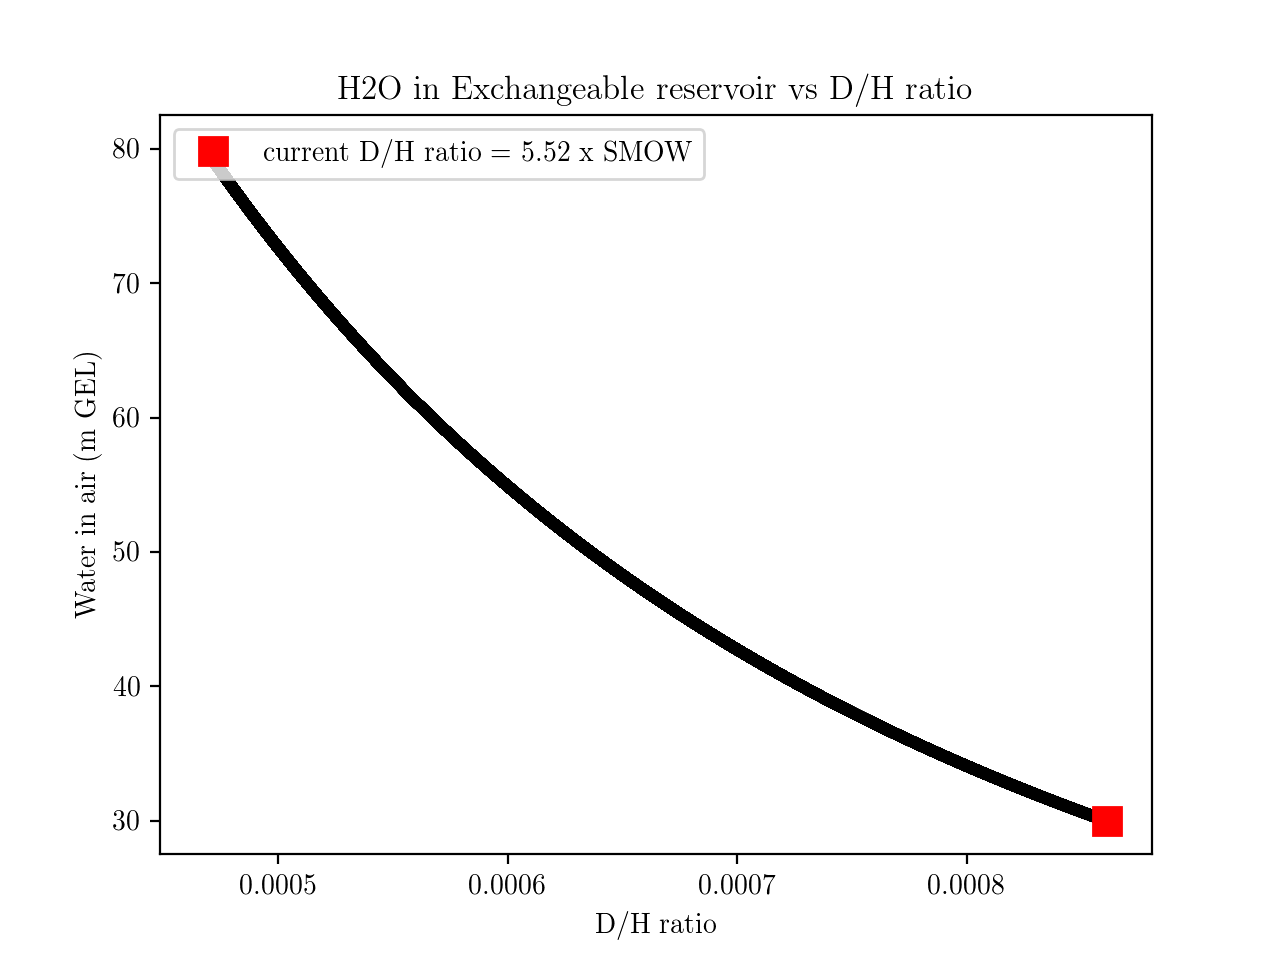

In [25]:
#plotting amount of water vs D/H ratio 
# total time
tf = 3e9
#total number of steps of model
n = 100000

#plotting routine
f = plt.figure()
ax = f.gca()
ax.plot(DF.DH, rGEL(DF.Exch_Res), 'k.')
ax.set_ylabel('Water in air (m GEL)')
ax.set_xlabel('D/H ratio')
ax.set_title('H2O in Exchangeable reservoir vs D/H ratio')
ax.xaxis.set_ticks(np.arange(0.0001, 0.0009, 0.0001))
labels = np.round(np.arange(0.0001, 0.0009, 0.0001),4)
ax.set_xticklabels(labels)
endpt = ax.plot(DF.DH[n],rGEL(DF.Exch_Res[n]),'s',markersize=10, color="red")
ax.legend(endpt,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+' x SMOW'],numpoints=1,loc=2)
#plt.savefig('DH_water_enrichmentW.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


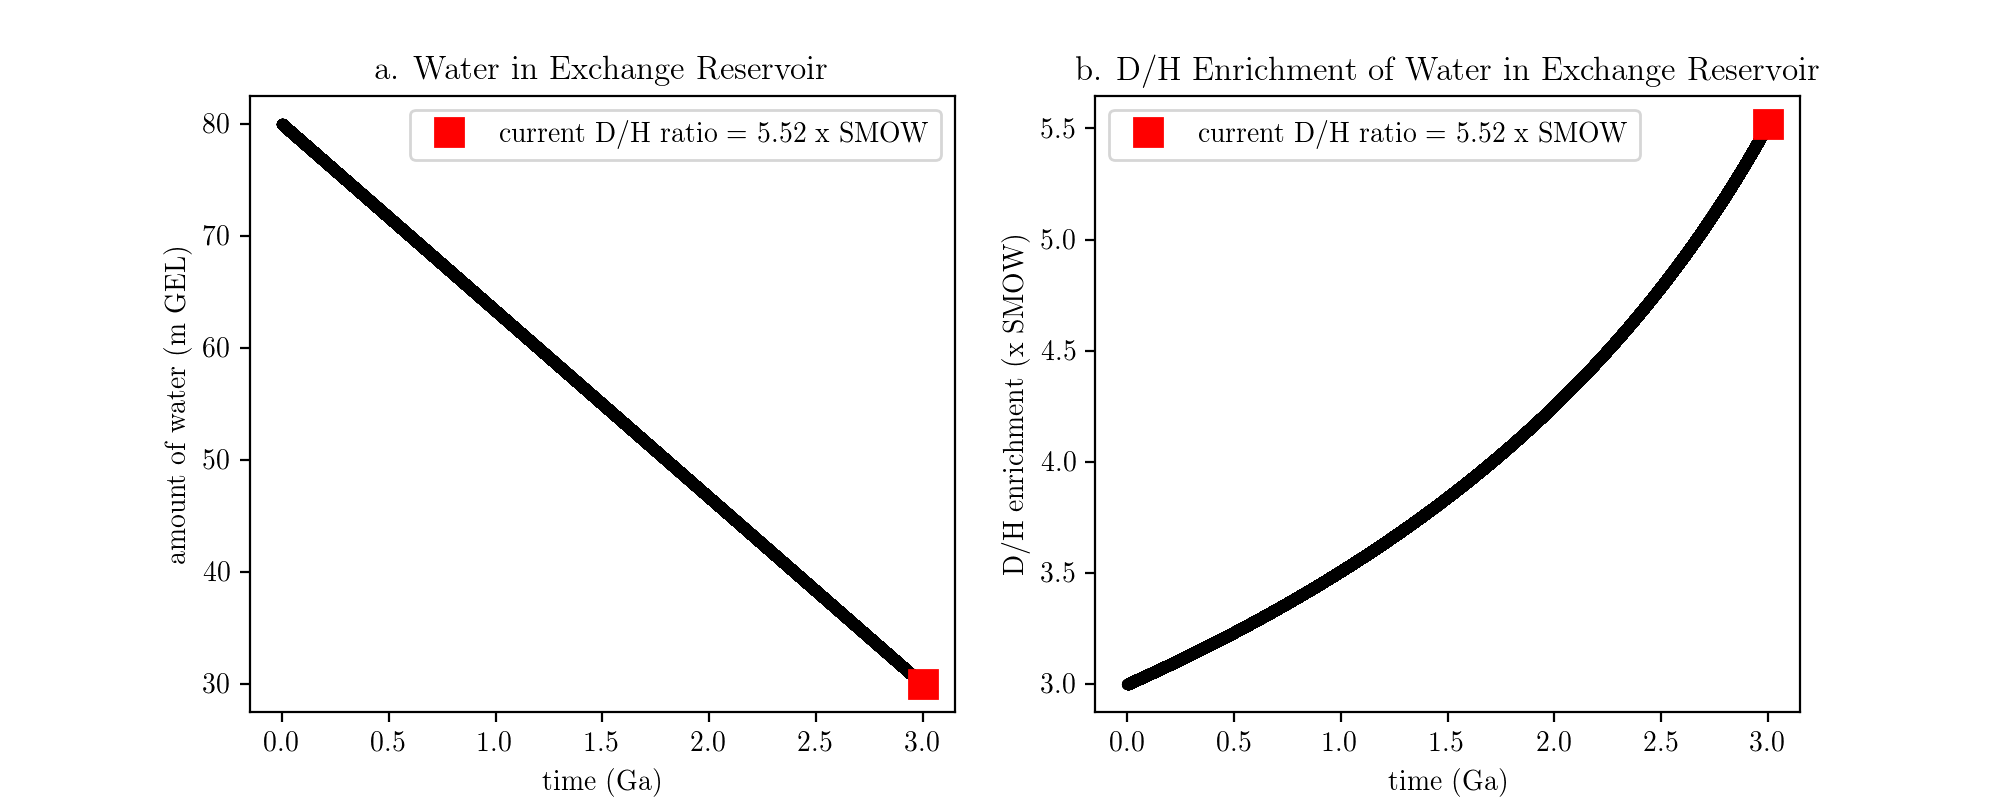

In [6]:

fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(hspace=.3)
n = 100000
sc1 = ax[0].plot(DF.t/1e9, rGEL(DF.Exch_Res), 'k.')
ax[0].set_title('a. Water in Exchange Reservoir')
ax[0].set_xlabel('time (Ga)')
ax[0].set_ylabel('amount of water (m GEL)')
endpt1 = ax[0].plot(DF.t[n]/1e9,rGEL(DF.Exch_Res[n]),'s',markersize=10, color="red")
ax[0].legend(endpt1,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+' x SMOW'],numpoints=1,loc=1)


sc2 = ax[1].plot(DF.t/1e9, DF.DH/DH_before, 'k.')
ax[1].set_title('b. D/H Enrichment of Water in Exchange Reservoir')
ax[1].set_xlabel('time (Ga)')
ax[1].set_ylabel('D/H enrichment (x SMOW)')
endpt2 = ax[1].plot(tf/1e9,DF.DH[n]/DH_before,'s',markersize=10, color="red")
ax[1].legend(endpt2,["current D/H ratio = " + str(round(DF.DH[n]/DH_before,3))+ " x SMOW"],numpoints=1,loc=2)
#plt.savefig('2part_DH_water_time.jpg', dpi=300)
plt.show()

## Parameter study 

In [7]:
Dataf_test = ps(40,50,15,18,80,90,0.32,'testrun_module.csv')

<IPython.core.display.Javascript object>


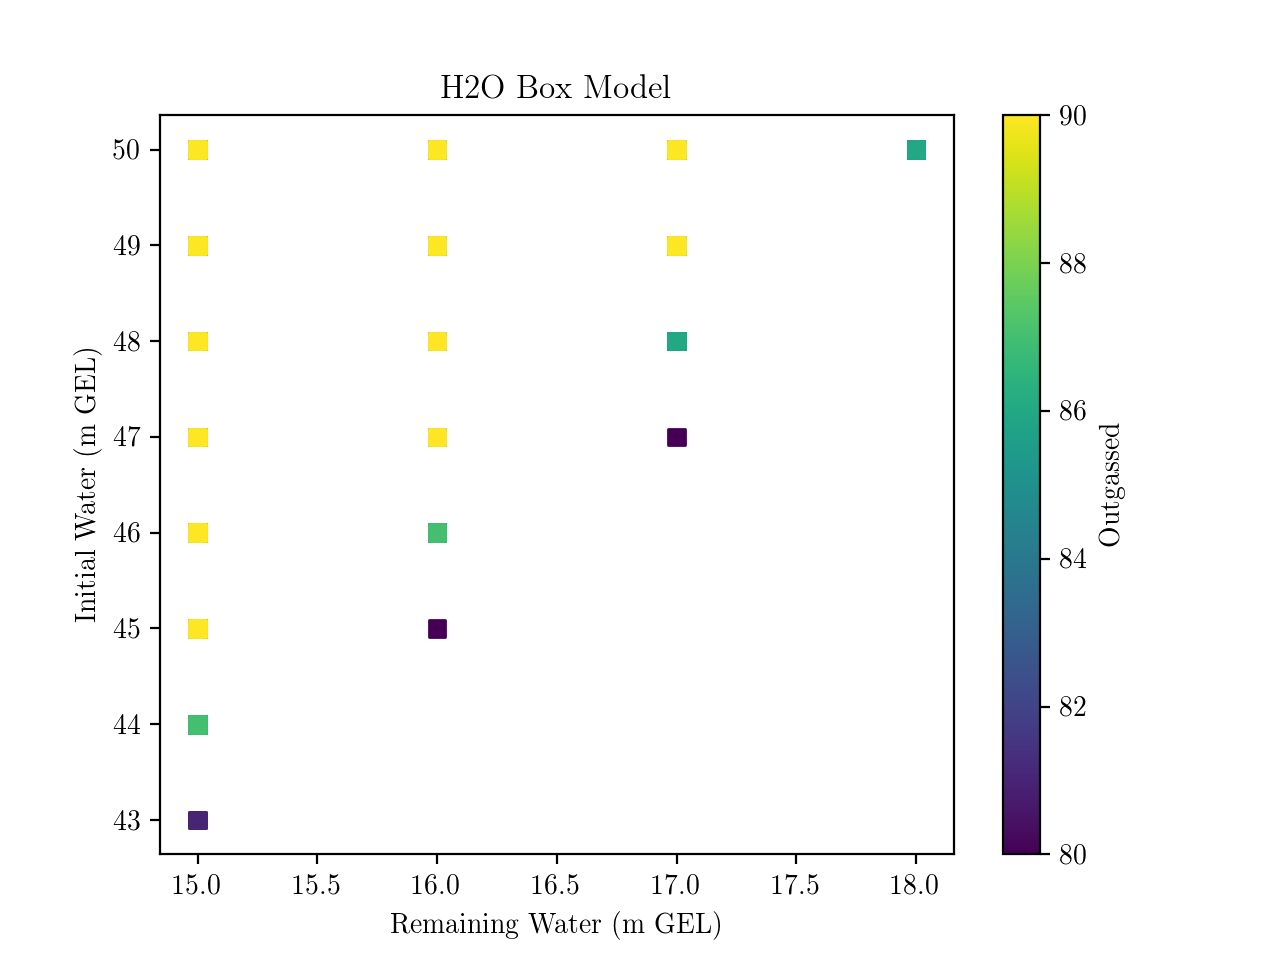

Text(0.5,1,'H2O Box Model')

In [8]:
#plotting results of the test run
sc = plt.scatter(Dataf_test.Remainder, Dataf_test.Initial,  c=Dataf_test.Outgassed,marker='s')
cb = plt.colorbar(sc)
cb.set_label('Outgassed')
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model')

## Uploading previous runs of the parameter study and plotting the results

In [9]:
Df = pd.read_csv('R32_DH_parameter_study.csv')
Df_FF = pd.read_csv('R1e-5_DH_parameter_study.csv')

In [14]:
#reducing data to remove overlapping points and show only the minimum and maximum outgassing of the overlapping points
#all points in between minimum and maximum outgassing are also succesful runs
#then, add the minimums and maximums so that we display the sum of min + max outgassing
#when sum = 105 m (minimum possible to maximum possible outgassing, then all outgassing rates are valid)
#when sum > 105 m (the minimum outgassing rate is higher than 5m GEL so its a narrower range of successful runs)
#when sum < 105 m (the maximum outgassing rate is lower than 100m GEL so its a narrower range of successful runs)
minmax = Df.groupby(['Initial', 'Remainder']).Outgassed.min().reset_index(name='Min')
maxs = Df.groupby(['Initial', 'Remainder']).Outgassed.max().reset_index(name='Max')
minmax['Max'] = maxs.Max
minmax['Sum']= minmax.Min+minmax.Max
##
##
FFminmax = Df_FF.groupby(['Initial', 'Remainder']).Outgassed.min().reset_index(name='Min')
FFmaxs = Df_FF.groupby(['Initial', 'Remainder']).Outgassed.max().reset_index(name='Max')
FFminmax['Max'] = FFmaxs.Max
FFminmax['Sum']= FFminmax.Min+FFminmax.Max

<IPython.core.display.Javascript object>


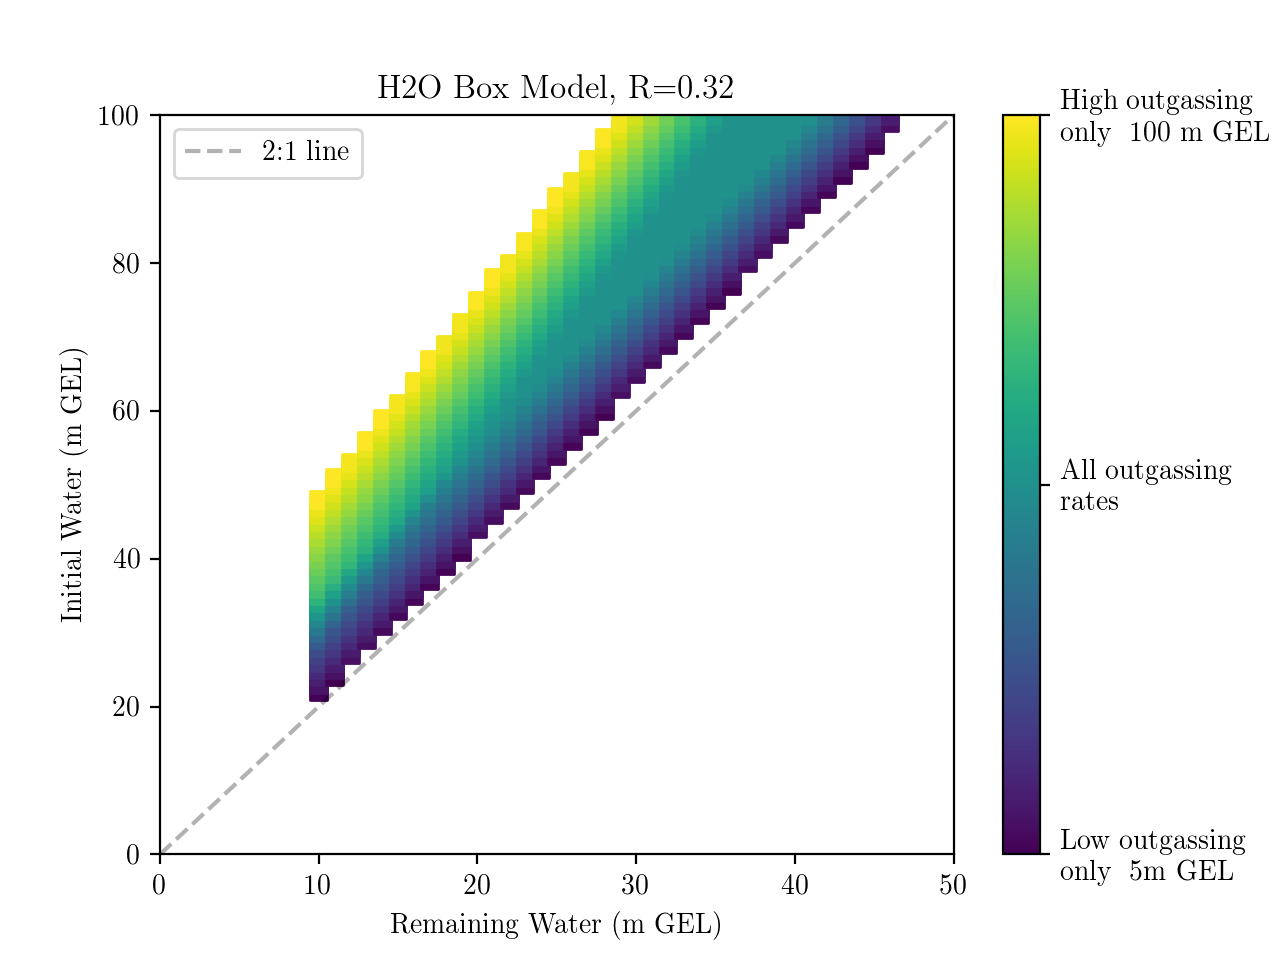

In [12]:
#plotting the successful runs without overlap
sc = plt.scatter(minmax.Remainder, minmax.Initial,  c=(minmax.Sum),marker='s')
cb = plt.colorbar(sc)
cb.set_ticks([minmax.Sum.min(),105,minmax.Sum.max()])
cb.set_ticklabels(['Low outgassing'+'\n'+'only ~5m GEL', 'All outgassing'+'\n'+'rates', 'High outgassing'+'\n'+'only ~100 m GEL'])
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model, R=0.32')

#plot y=2x line
x= np.linspace(0,50)
y = 2*x
line1 = plt.plot(x,y,'k',linestyle='dashed',alpha=0.3)
plt.legend(line1, ["2:1 line"], fancybox=True)

#axes limits
plt.ylim(0,100)
plt.xlim(0,50)
#plt.savefig('DH_box_results_r0-32.jpg', transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


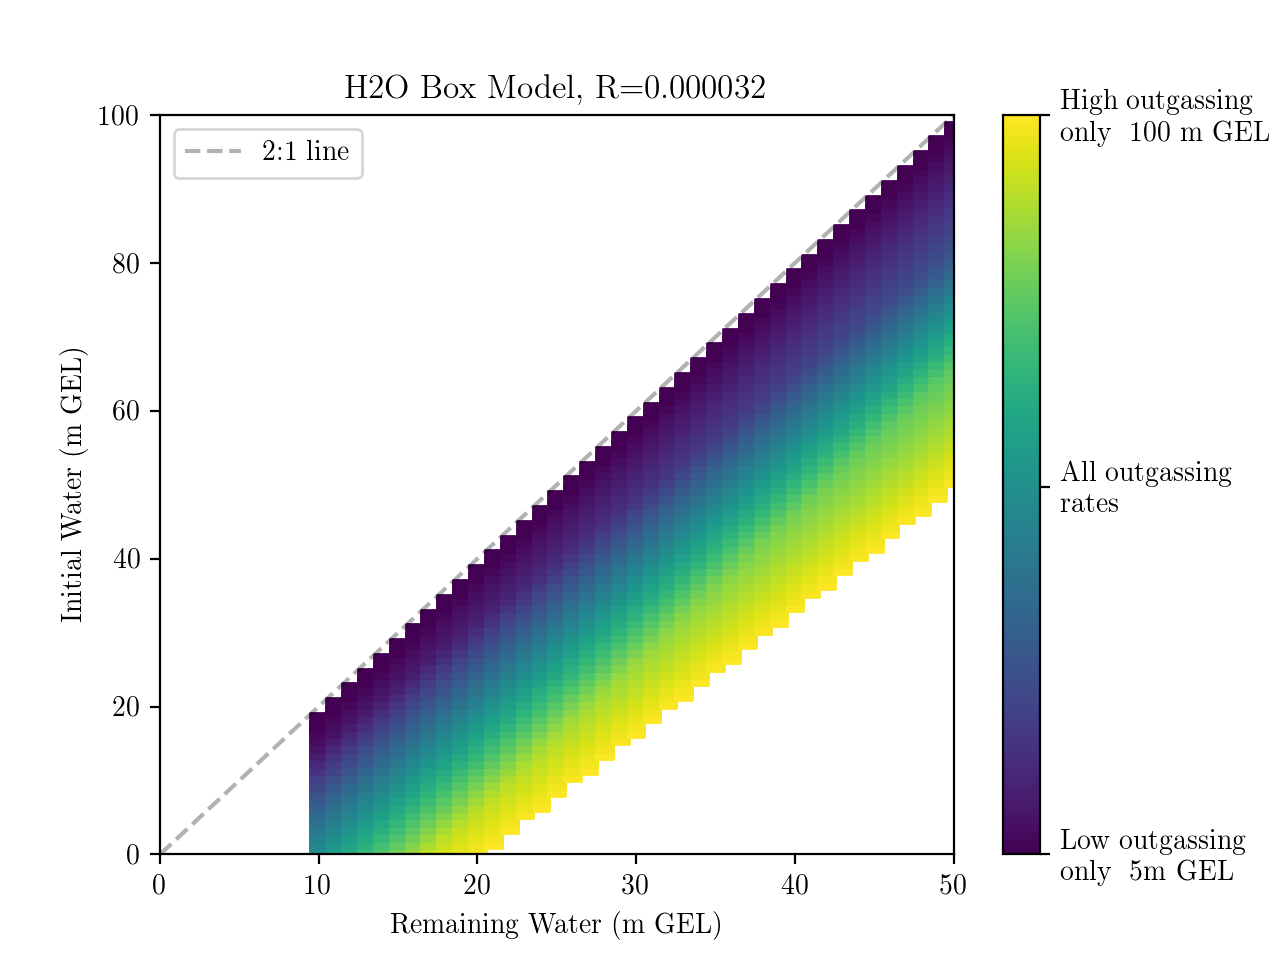

In [11]:
#plotting the successful runs without overlap
sc = plt.scatter(FFminmax.Remainder, FFminmax.Initial,  c=(FFminmax.Sum),marker='s')
cb = plt.colorbar(sc)
cb.set_ticks([FFminmax.Sum.min(),105,FFminmax.Sum.max()])
cb.set_ticklabels(['Low outgassing'+'\n'+'only ~5m GEL', 'All outgassing'+'\n'+'rates', 'High outgassing'+'\n'+'only ~100 m GEL'])
plt.xlabel('Remaining Water (m GEL)')
plt.ylabel('Initial Water (m GEL)')
plt.title('H2O Box Model, R=0.000032')

#plotting the y=2x line
x= np.linspace(0,50)
y = 2*x
line1 = plt.plot(x,y,'k',linestyle='dashed',alpha=0.3, label = ('2:1 line'))
plt.legend(line1, ["2:1 line"], fancybox=True)

#axes limits
plt.ylim(0,100)
plt.xlim(0,50)
#plt.savefig('DH_box_results_r0-000032.jpg', transparent=True, dpi=300)
plt.show()